In [1]:
from konlpy.tag import Okt

twitter=Okt()

# 형태소 분석, norm 정규화, stem 어근화
word_list=twitter.pos('아버지가 방에 들어가신다.', norm=True, stem=True)
print(word_list)

[('아버지', 'Noun'), ('가', 'Josa'), ('방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]


In [2]:
from gensim.models import word2vec
import codecs

f=open('d:/data/text/ratings.csv', encoding='ms949') # 분석할 텍스트 파일 불러오기
data=f.read()
twitter=Okt()
# 전체 텍스트를 라인 단위로 나누어 배열로 저장
lines=data.split('\n')
results=[]
print(len(lines))
for line in lines[:1000]: # 1000 샘플만 실행
    print(line[:10])
    r=[]
    word_list=twitter.pos(line,norm=True,stem=True)
    # 조사, 어미, 문장부호를 제외하고 배열에 추가
    for (word, pumsa) in word_list:
        if not pumsa in ['Josa','Eomi','Punctuation']:
            r.append(word)
    results.append((' '.join(r)).strip())

output=(' '.join(results)).strip()
with open('d:/data/text/text_prepared.dat','w',encoding='utf-8') as fp:
    fp.write(output)

print('작업 완료')

150001
아 더빙.. 진짜 
흠...포스터보고 
너무재밓었다그래서보
교도소 이야기구먼 
사이몬페그의 익살스
막 걸음마 뗀 3세
원작의 긴장감을 제
별 반개도 아깝다 
액션이 없는데도 재
왜케 평점이 낮은건
걍인피니트가짱이다.
볼때마다 눈물나서 
울면서 손들고 횡단
담백하고 깔끔해서 
취향은 존중한다지만
ㄱ냥 매번 긴장되고
참 사람들 웃긴게 
굿바이 레닌 표절인
이건 정말 깨알 캐
"약탈자를 위한 변
나름 심오한 뜻도 
보면서 웃지 않는 
"재미없다 지루하고
절대 평범한 영화가
주제는 좋은데 중반
다 짤랐을꺼야. 그
kl2g 고추를 털
카밀라벨 발연기
재밋는뎅
센스있는 연출력..
엄포스의 위력을 다
졸쓰레기 진부하고말
재밌는데 별점이 왜
1%라도 기대했던 
아직도 이 드라마는
패션에 대한 열정!
키이라 나이틀리가 
허허...원작가 정
포스터는 있어보이는
이 영화가 왜 이렇
단순하면서 은은한 
'다 알바생인가 내
오게두어라! 서리한
정말 맘에 들어요.
윤제문이라는 멋진 
평점에속지마시길시간
리얼리티가 뛰어나긴
마이너스는 왜없냐 
난 우리영화를 사랑
"데너리스 타르 가
영화가 사람의 영혼
야 세르게이! 작은
이렇게 가슴시리게 
"난또 저 꼬마애가
재미있어요
전 좋아요
최고
너무 충격적이엇다.
심심한영화.
백봉기 언제나오나요
보는내내 그대로 들
불알이 나와서 당황
평범함속에 녹아든 
보던거라 계속보고있
"사랑하고싶게하는,
"많은 사람들이 이
"예전 작품 캐릭터
김남길의 백점짜리 
재밌네 비슷한 영화
노래실력으로뽑는게 
아 일본영화 다이런
이틀만에 다 봤어요
졸작
재밋네요 달팽이가 
어설픈 전개 어이없
부패한 로마노프 왕
내용전개는 무난한 
매우 실망.....
한국영화 흥행코드:
아햏햏 아햏햏 아햏
뭐냐..시작하고 3
단연 최고라고 할수
"감독이 럼먹고 영
이건 뭐냐? 우뢰매
정말쓰레기영화입니다
진정 위대한 영화 
별루 였다..
내일이 기대되는 `
근데 조미가 막문위
ㅋㅋㅋ 진짜 골깜.
성룡영화중 최악인듯
골때리네ㅋㅋㅋㅋ 걸
서기가이뻐서
완전 재밌어요ㅋㅋㅋ
인상적인

In [3]:
# 저장된 파일을 이용하여 word2vec 모델을 만드는 과정
data=word2vec.LineSentence('d:/data/text/text_prepared.dat')
model=word2vec.Word2Vec(data, vector_size=100, window=10, hs=1, min_count=2, sg=1)
# vector_size : 벡터 차원, window=10 : 앞뒤 10개의 주변 단어를 문맥으로 보고 예측 모델에 반영
# hs=1 : 소프트맥스 사용, min_count=2 : 출현 빈도 2 미만은 제외, sg=1 : cbow와 skip-gram 알고리즘 중 skip-gram 사용
model.save('d:/data/text/text_100.model') # 모델을 파일로 저장
print('word2vec 모델 생성 완료')

word2vec 모델 생성 완료


In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text=open('d:/data/text/ratings.csv', encoding='ms949').read()
wordcloud=WordCloud(font_path='c:/windows/fonts/malgun.ttf').generate(text)
wordcloud.words_

print('wordcloud 생성 완료')

wordcloud 생성 완료


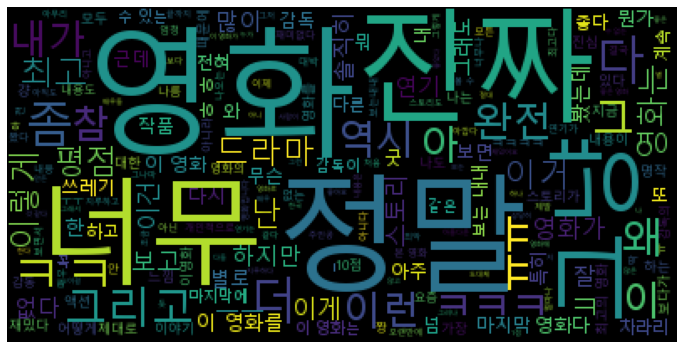

In [5]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [7]:
model=word2vec.Word2Vec.load('d:/data/text/text_100.model') # 저장된 모델 파일을 불러올 경우
# 키워드와 유사한 단어를 찾을 경우
print(model.wv.most_similar(positive=['영화']))
print(model.wv.most_similar(positive=['드라마']))
print(model.wv.similarity('영화', '드라마')) # similarity(A, B) : A와 B의 유사도
print(model.wv.doesnt_match('영화 드라마 이야기 완전'.split())) # 이상한 키워드 찾기


[('코믹', 0.9755915403366089), ('갑자기', 0.9746525287628174), ('어이없다', 0.9733564853668213), ('원주민', 0.9709091782569885), ('기존', 0.9704487323760986), ('최고', 0.9702190160751343), ('훈훈하다', 0.9700621962547302), ('드럽다', 0.9694408774375916), ('다른', 0.9692921042442322), ('유치하다', 0.9691543579101562)]
[('걱정', 0.9768611192703247), ('음악', 0.9756032824516296), ('대사', 0.9740486145019531), ('새롭다', 0.9717281460762024), ('거기', 0.9708020687103271), ('요즘', 0.9707964062690735), ('되다', 0.9682491421699524), ('좋다', 0.9672812819480896), ('부족하다', 0.9661598801612854), ('시간', 0.9659364819526672)]
0.8969459
완전
